# Análise dos Acidentes de Trânsito e suas Condições Metereológicas

## Projeto da disciplina **SSC0957 - Práticas em Ciência de Dados II**

* Alexandre Eduardo de Souza Jesus - alexandre_souza@usp.br - 12559506

* Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

---

## 1. Introdução

## 2. Metodologia

## 3. Compreensão dos Dados

### 3.1. Coleta de Dados

O conjunto de dados utilizado para a análise do problema foi coletado no site do Governo Federal, disponível em [Acidentes](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes). Os dados foram coletados e registrados pela Polícia Rodoviária Federal, agrupado por ocorrências de 2007 até fevereiro de 2023.

### 3.2. Dicionário de Dados

* **data_inversa**: Data da ocorrência no formato *mm/dd/aaaa*;

* **dia_semana**: Dia da semana da ocorrência;

* **horario**: Horário da ocorrência no formato *hh:mm:ss*;

* **uf**: Unidade da federação;

* **municipio**: Nome do município de ocorrência do acidente;

* **causa_acidente**: Identificação da causa principal do acidente;

* **tipo_acidente**: Identificação do tipo de acidente;

* **classificação_acidente**: Classificação quanto à gravidade do acidente;

* **sentido_via**: Sentido da via considerando o ponto de colisão;

* **condição_metereologica**: Condição metereológica no momento do acidente;

* **tipo_pista**: Tipo da pista considerando a quantidade de faixas;

* **tracado_via**: Descrição do traçado da via;

* **uso_solo**: Descrição sobre as características do local do acidente (Urbano = "Sim", Rural = "Não");

* **latitude**: Latitude do local do acidente em formato geodésico decimal;

* **longitude**: Longitude do local do acidente em formato geodésico decimal;

* **pessoas**: Total de pessoas envolvidas na ocorrência;

* **mortos**: Total de pessoas mortas envolvidas na ocorrência;

* **feridos_leves**: Total de pessoas com ferimentos leves envolvidas na ocorrência;

* **feridos**: Total de pessoas feridas envolvidas na ocorrência;

* **ilesos**: Total de pessoas ilesas envolvidas na ocorrência;

* **ignorados**: Total de pessoas envolvidas na ocorrência e que não se soube o estado físico;

* **veiculos**: Total de veículos envolvidos na ocorrência;

### 3.3. Tipo das Variáveis

* **Variáveis numéricas**:
    * Discretas:
        * pessoas;
        * mortos;
        * feridos_leves;
        * feridos_graves;
        * ilesos;
        * ignorados;
        * feridos;
        * veículos.

    * Contínuas:
        * latitude;
        * longitude;
        * horario.





* **Variáveis qualitativas**:
    * Ordinais:
        * data_inversa;      
        * dia_semana;
        *fase_dia.

    * Nominais:
        * uf;      
        * municipio;       
        * causa_acidente;
        * tipo_acidente;   
        * sentido_via;
        * condicao_metereologica;         
        * tipo_pista;
        * tracado_via;
        * uso_solo.


## 4. Tratamento dos Dados

In [273]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import calendar

pd.set_option('mode.chained_assignment', None)

In [274]:
# Leitura dos dados de 2022
datatran_df = pd.read_csv("data/datatran_2022.csv")
datatran_df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,1/1/2022,sábado,1:35:00,PI,316.0,415.0,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,-7.432800,-40.682619,SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,1/1/2022,sábado,2:40:00,PR,116.0,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,1/1/2022,sábado,5:22:00,MS,163.0,393.0,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,-21.228445,-54.456296,SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,1/1/2022,sábado,7:00:00,RJ,101.0,457.0,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,-23.031498,-44.177153,SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,1/1/2022,sábado,9:00:00,MG,40.0,508.3,RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,-19.760612,-44.134754,SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [275]:
# Dropando colunas desinteressantes à análise
datatran_df.drop(columns = ['uop','delegacia','regional','br', 'km', 'id'], inplace = True)

In [276]:
# Nenhuma ocorrência com valor NaN
datatran_df[datatran_df.isna().any(axis=1)]

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude


In [277]:
# Quantidade de ocorrências registradas em 2022
len(datatran_df)

64547

## 5. Análise Exploratória dos Dados

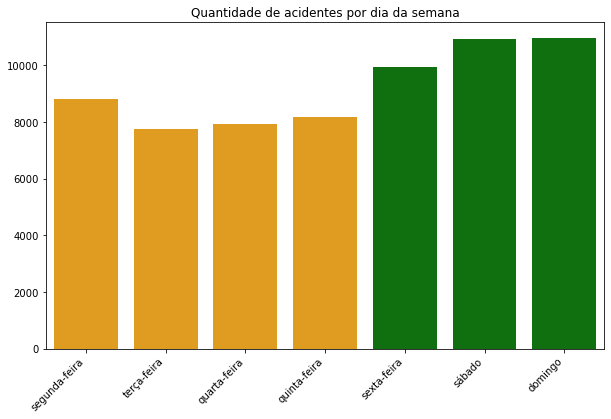

In [302]:
plt.figure(figsize=(10, 6)) 

dias_semana = ['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo']

cols = ['green' if x in ['sexta-feira','sábado','domingo'] else 'orange' for x in dias_semana]

sns.barplot(x=datatran_df['dia_semana'].value_counts().index, 
            y=datatran_df['dia_semana'].value_counts().tolist(), 
            palette = cols,
            order = dias_semana)

plt.xticks(rotation=45, ha='right')
plt.title("Quantidade de acidentes por dia da semana")
plt.show()

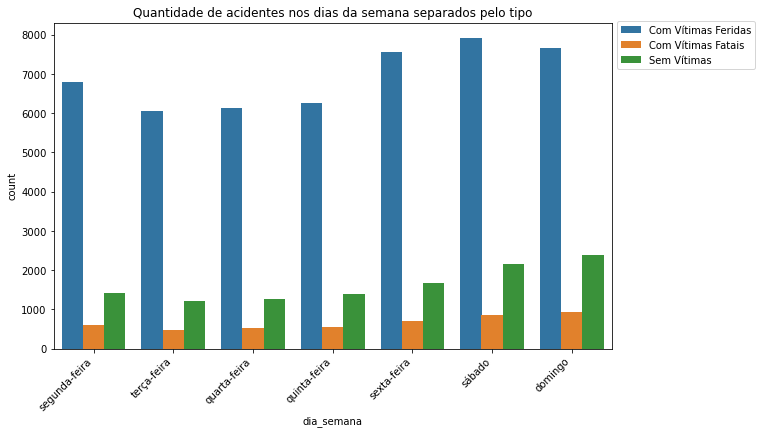

In [301]:
plt.figure(figsize=(10, 6)) 

datatran_df.loc[datatran_df.loc[datatran_df['classificacao_acidente'] == 'Com Vítimas FeridasCom Vítimas Feridas'].index, 'classificacao_acidente'] = 'Com Vítimas Feridas'

sns.countplot(data=datatran_df, x="dia_semana", hue = 'classificacao_acidente', order = ['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo'])
plt.xticks(rotation=45, ha='right')
plt.legend(labels=datatran_df['classificacao_acidente'].unique().tolist(), loc = 2, bbox_to_anchor = (1,1.02))
plt.title("Quantidade de acidentes nos dias da semana separados pelo tipo")
plt.show()

In [280]:
datatran_df['data_inversa'] = pd.to_datetime(datatran_df['data_inversa'], format='%m/%d/%Y')

datatran_df['mes'] = datatran_df['data_inversa'].dt.month

meses_em_portugues = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

datatran_df['mes'] = datatran_df['mes'].map(meses_em_portugues)


datatran_df.head()

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,mes
0,2022-01-01,sábado,1:35:00,PI,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,...,0,1,0,1,0,1,2,-7.432800,-40.682619,Janeiro
1,2022-01-01,sábado,2:40:00,PR,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,...,1,1,0,0,0,1,1,-25.114403,-48.846755,Janeiro
2,2022-01-01,sábado,5:22:00,MS,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,...,0,1,0,1,0,1,2,-21.228445,-54.456296,Janeiro
3,2022-01-01,sábado,7:00:00,RJ,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,...,0,0,1,1,0,1,2,-23.031498,-44.177153,Janeiro
4,2022-01-01,sábado,9:00:00,MG,RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,...,0,0,0,3,0,0,1,-19.760612,-44.134754,Janeiro


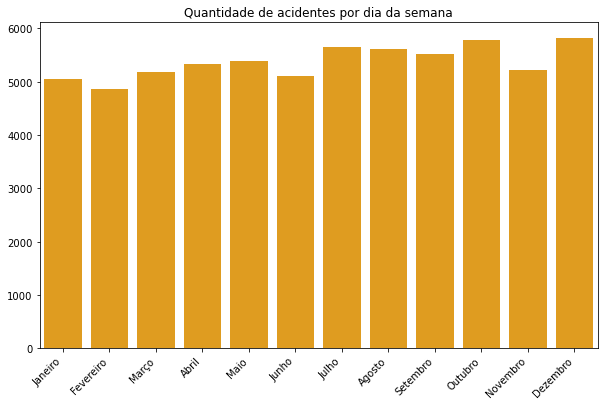

In [300]:
plt.figure(figsize=(10, 6)) 

sns.barplot(x=datatran_df['mes'].value_counts().index, 
            y=datatran_df['mes'].value_counts().tolist(), 
            color = 'orange',
            order = list(meses_em_portugues.values()))

plt.xticks(rotation=45, ha='right')
plt.title("Quantidade de acidentes por dia da semana")
plt.show()


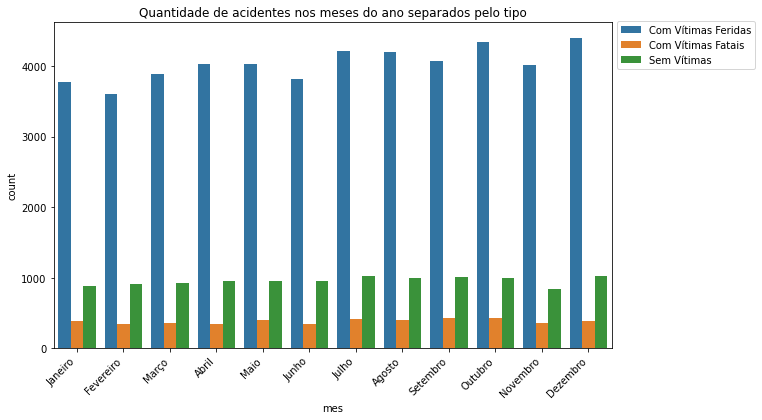

In [299]:
plt.figure(figsize=(10, 6)) 

sns.countplot(data=datatran_df, x="mes", hue = 'classificacao_acidente', order = list(meses_em_portugues.values()))
plt.xticks(rotation=45, ha='right')
plt.legend(labels=datatran_df['classificacao_acidente'].unique().tolist(), loc = 2, bbox_to_anchor = (1,1.02))
plt.title("Quantidade de acidentes nos meses do ano separados pelo tipo")
plt.show()

In [283]:
datatran_df['horario_dt'] = pd.to_datetime(datatran_df['horario'], format='%H:%M:%S')
datatran_df['periodo'] = datatran_df['horario_dt'].dt.hour
datatran_df['periodo'] = datatran_df['periodo'].astype(str) + 'h'
datatran_df.head()



,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,mes,horario_dt,periodo
0,2022-01-01,sábado,1:35:00,PI,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,...,0,1,0,1,2,-7.432800,-40.682619,Janeiro,1900-01-01 01:35:00,1h
1,2022-01-01,sábado,2:40:00,PR,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,...,0,0,0,1,1,-25.114403,-48.846755,Janeiro,1900-01-01 02:40:00,2h
2,2022-01-01,sábado,5:22:00,MS,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,...,0,1,0,1,2,-21.228445,-54.456296,Janeiro,1900-01-01 05:22:00,5h
3,2022-01-01,sábado,7:00:00,RJ,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,...,1,1,0,1,2,-23.031498,-44.177153,Janeiro,1900-01-01 07:00:00,7h
4,2022-01-01,sábado,9:00:00,MG,RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,...,0,3,0,0,1,-19.760612,-44.134754,Janeiro,1900-01-01 09:00:00,9h


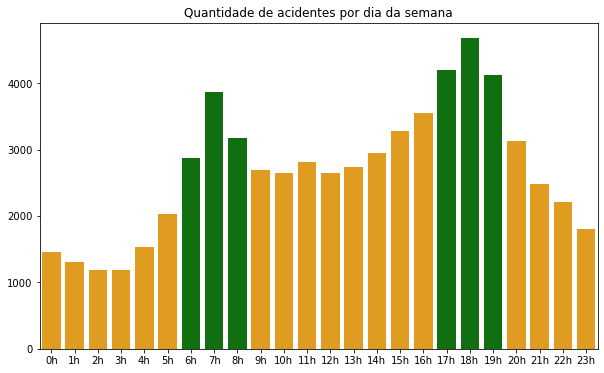

In [298]:
plt.figure(figsize=(10, 6)) 

periodos = ['0h', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h']

cols = ['green' if x in ['6h','7h','8h', '17h', '18h','19h'] else 'orange' for x in periodos]

sns.barplot(x=datatran_df['periodo'].value_counts().index, 
            y=datatran_df['periodo'].value_counts().tolist(), 
            palette = cols,
            order = periodos
            
)

# sns.lineplot(x=datatran_df['periodo'].value_counts().index, 
#             y=datatran_df['periodo'].value_counts().tolist(),
#             sort = False)

plt.title("Quantidade de acidentes por dia da semana")
plt.show()




In [285]:
datatran_df['periodo']

0         1h
1         2h
2         5h
3         7h
4         9h
        ... 
64542    20h
64543     2h
64544    19h
64545     9h
64546    18h
Name: periodo, Length: 64547, dtype: object

In [286]:
# Coletando Acidentes que possuem como causa principal a Chuva
df_chuva = datatran_df[datatran_df['causa_acidente'] == 'Chuva']
df_chuva.head()

,data_inversa,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,mes,horario_dt,periodo
6,2022-01-01,sábado,10:20:00,MG,CAETANOPOLIS,Chuva,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,...,0,2,0,1,2,-19.333821,-44.361079,Janeiro,1900-01-01 10:20:00,10h
29,2022-01-02,domingo,16:00:00,DF,BRASILIA,Chuva,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,...,0,2,0,1,2,-15.943619,-48.172115,Janeiro,1900-01-01 16:00:00,16h
72,2022-01-03,segunda-feira,21:15:00,MG,SANTANA DO PARAISO,Chuva,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,...,0,1,0,2,2,-19.388008,-42.476167,Janeiro,1900-01-01 21:15:00,21h
175,2022-01-06,quinta-feira,15:05:00,ES,DOMINGOS MARTINS,Chuva,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,...,4,1,0,4,2,-20.380268,-40.630009,Janeiro,1900-01-01 15:05:00,15h
183,2022-01-06,quinta-feira,17:50:00,GO,TEREZOPOLIS DE GOIAS,Chuva,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,...,0,2,0,1,1,-16.478900,-49.086400,Janeiro,1900-01-01 17:50:00,17h


In [287]:
dados_grafico = pd.DataFrame({'Estado' : df_chuva['uf'].unique(),
                             'Acidentes' : df_chuva['uf'].value_counts().tolist()})

aux = {'Estado' : 'AM', 'Acidentes' : 0}

dados_grafico = dados_grafico.append(aux, ignore_index = True)
                     
dados_grafico = dados_grafico.sort_values(by='Estado')

/tmp/ipykernel_348/3552681247.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_grafico = dados_grafico.append(aux, ignore_index = True)


In [288]:
dados_grafico

,Estado,Acidentes
25,AC,1
14,AL,14
26,AM,0
24,AP,2
12,BA,18
21,CE,5
1,DF,157
2,ES,131
3,GO,101
15,MA,13


In [289]:
br_states = gpd.read_file('data/gadm36_BRA_1.shp')
br_states = br_states.sort_values(by='HASC_1')
br_states

KeyError: 'HASC_1'

In [ ]:
br_states['Acidentes'] = dados_grafico['Acidentes'].tolist()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
br_states.plot(column='Acidentes', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_axis_off()

leg = ax.get_legend()

In [ ]:
tipo_solo = lambda x: 'Urbano' if x == 'Sim' else 'Rural'
df_chuva.loc[:, 'solo'] = df_chuva['uso_solo'].apply(tipo_solo)

plt.figure(figsize=(6.5, 6.5))
plt.title('Relação entre tipo do solo e acidentes')
plt.pie(df_chuva['solo'].value_counts(), explode = (0.1, 0), labels=df_chuva['solo'].unique(), autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
percentages = datatran_df.causa_acidente.value_counts(normalize=True)
rain_percentage = percentages['Chuva']
all_percentages = np.sum(percentages.drop('Chuva'))

plt.figure(figsize=(6.5, 6.5))
plt.title('Porcentagem de acidentes causados por chuva')
plt.pie([rain_percentage, all_percentages], labels=['Chuva', 'Outras causas'], autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
df_chuva['solo'].value_counts()

In [ ]:
df_chuva['tipo_acidente'].value_counts()

In [ ]:
df_chuva['classificacao_acidente'].value_counts()

In [ ]:
df_chuva['tipo_pista'].value_counts()

In [ ]:
df_chuva['tracado_via'].value_counts()

In [ ]:
df_chuva['sentido_via'].value_counts()

In [ ]:
df_chuva['fase_dia'].value_counts()

In [ ]:
# Sol?
df_chuva['condicao_metereologica'].value_counts()